In [21]:
import numpy as np
import sklearn
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [2]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

data=ImageFolder("./archive/Dataset/", transform=data_transform)

In [3]:
c0=0    # mild
c1=0    # moderate
c2=0    # non
c3=0    # very mild
for i,d in enumerate(data):
    if data[i][1]==0:   c0+=1
    elif data[i][1]==1: c1+=1
    elif data[i][1]==2: c2+=1
    elif data[i][1]==3: c3+=1
print(c0,c1,c2,c3)

896 64 3200 2240


In [4]:
n=len(data)
n_test=int(0.2*n)   # 20% for test
train_data,test_data=random_split(data,[n-n_test,n_test],torch.Generator().manual_seed(42))

In [5]:
c0=0    # mild
c1=0    # moderate
c2=0    # non
c3=0    # very mild
for i,d in enumerate(test_data):
    if test_data[i][1]==0:   c0+=1
    elif test_data[i][1]==1: c1+=1
    elif test_data[i][1]==2: c2+=1
    elif test_data[i][1]==3: c3+=1
print(c0,c1,c2,c3)

179 13 634 454


In [6]:
trainloader=DataLoader(train_data,batch_size=64,shuffle=True)
testloader=DataLoader(test_data,batch_size=64,shuffle=False)

In [7]:
for i,data in enumerate(trainloader):
    imgs, targets=data
    if i<10: print(imgs.shape)
    else: break

torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])


<PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x12E93AB3D08>


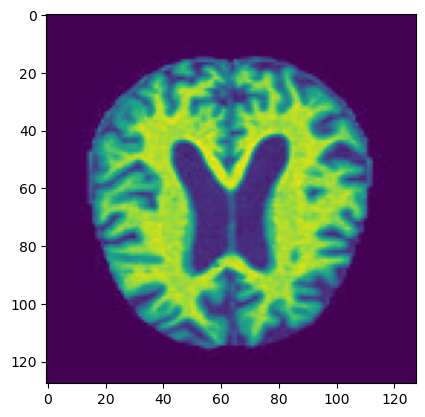

In [8]:
from PIL import Image
fig=Image.open("./archive/Dataset/Mild_Demented/mild.jpg")
plt.imshow(fig)
print(fig)

In [9]:
train_data_cls=[]
train_label_cls=[]
test_data_cls=[]
test_label_cls=[]
for i,data in enumerate(train_data):
    train_data_cls.append(np.array(data[0].view(1,-1)[0]))
    train_label_cls.append(data[1])

for i,data in enumerate(test_data):
    test_data_cls.append(np.array(data[0].view(1,-1)[0]))
    test_label_cls.append(data[1])

train_data_cls=np.array(train_data_cls)
test_data_cls=np.array(test_data_cls)

In [10]:
n_train=len(train_data_cls)
n_test=len(test_data_cls)
print(n_train,n_test)

5120 1280


In [26]:
data_cls=np.concatenate((train_data_cls,test_data_cls),axis=0)
label_cls=np.concatenate((train_label_cls,test_label_cls),axis=0)

# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_data_cls,train_label_cls)
knn_pred=knn.predict(test_data_cls)
print(np.mean(knn_pred==test_label_cls))

0.971875


In [31]:
knn2=KNeighborsClassifier(n_neighbors=10)
knn2.fit(train_data_cls,train_label_cls)
knn2_pred=knn2.predict(test_data_cls)
print(np.mean(knn2_pred==test_label_cls))

0.89296875


# Naive Bayes

In [13]:
train_c0=896-179
train_c1=64-13
train_c2=3200-634
train_c3=2240-454
total=train_c0+train_c1+train_c2+train_c3

In [14]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB(priors=[train_c0/total,train_c1/total,train_c2/total,train_c3/total])
nb.fit(train_data_cls,train_label_cls)
nb_pred=nb.predict(test_data_cls)
print(np.mean(nb_pred==test_label_cls))

0.4859375


In [29]:
nb2=GaussianNB(priors=[0.25,0.25,0.25,0.25])
nb2.fit(train_data_cls,train_label_cls)
nb2_pred=nb2.predict(test_data_cls)
print(np.mean(nb2_pred==test_label_cls))

0.4859375


# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(train_data_cls,train_label_cls)
log_pred=log.predict(test_data_cls)
print(np.mean(log_pred==test_label_cls))

0.89375


c:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_data_cls,train_label_cls)
dt_pred=dt.predict(test_data_cls)
print(np.mean(dt_pred==test_label_cls))

0.684375


# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_data_cls,train_label_cls)
rf_pred=rf.predict(test_data_cls)
print(np.mean(rf_pred==test_label_cls))

0.921875


# SVM

In [18]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(train_data_cls,train_label_cls)
svc_pred=svc.predict(test_data_cls)
print(np.mean(svc_pred==test_label_cls))

0.7671875


In [20]:
from sklearn.svm import SVC

svc_linear=SVC(kernel='linear')
svc_linear.fit(train_data_cls,train_label_cls)
svc_linear_pred=svc.predict(test_data_cls)
print(np.mean(svc_linear_pred==test_label_cls))

0.7671875


# Comparison

In [37]:
acc=[knn2_pred,nb_pred,log_pred,dt_pred,rf_pred,svc_pred]
acc=[np.mean(i==test_label_cls) for i in acc]
labels=["KNN","Naive Bayes","Logistic Regression","Decision Tree", "Random Forest","SVM"]
print(acc)

[0.89296875, 0.4859375, 0.89375, 0.684375, 0.921875, 0.7671875]


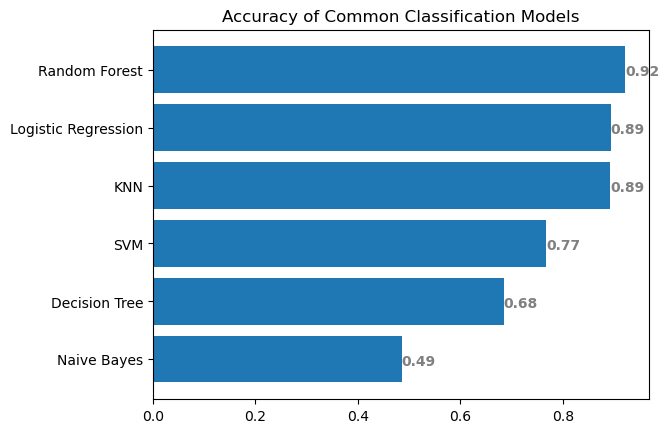

In [46]:
fig, ax = plt.subplots()
indexes = np.argsort(-np.array(acc))
acc_sorted = [acc[i] for i in indexes]
labels_sorted = [labels[i] for i in indexes]
y_pos = np.arange(len(labels))
ax.barh(y_pos,acc_sorted,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels_sorted)
ax.invert_yaxis()  
ax.set_title("Accuracy of Common Classification Models")
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize=10, fontweight='bold', color='grey') 

# Learning Curve

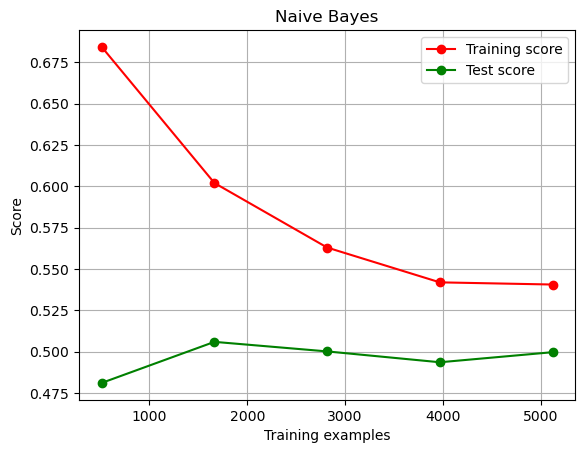

In [27]:
def plot_learning_curve(estimator,title, X, y,
                        ax, 
                        ylim=None, 
                        cv=None, 
                        n_jobs=None 
                        ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,cv=cv,n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

plt.figure()
plot_learning_curve(nb, "Naive Bayes", data_cls, label_cls, ax=plt.gca(),n_jobs=4, cv=5);

<AxesSubplot:title={'center':'Logistic Regression'}, xlabel='Training examples', ylabel='Score'>

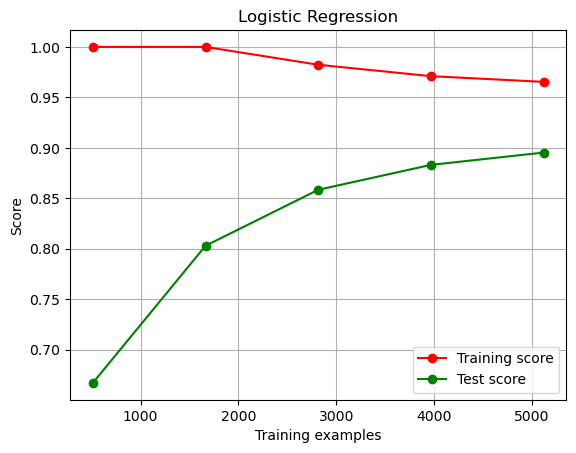

In [28]:
plt.figure()
plot_learning_curve(log,"Logistic Regression",data_cls,label_cls,ax=plt.gca(),n_jobs=4,cv=5)

<AxesSubplot:title={'center':'K Nearest Neighbor'}, xlabel='Training examples', ylabel='Score'>

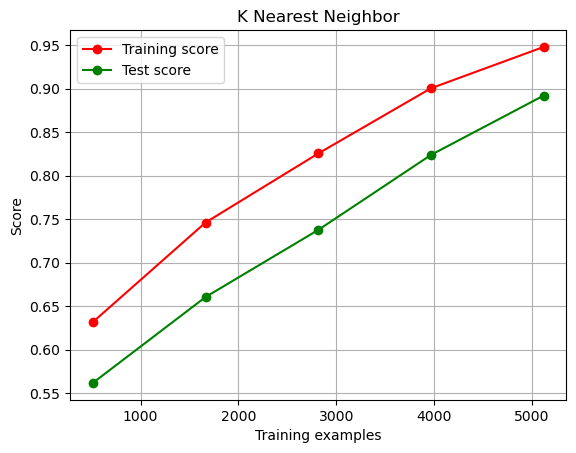

In [32]:
plt.figure()
plot_learning_curve(knn2,"K Nearest Neighbor",data_cls,label_cls,ax=plt.gca(),n_jobs=4,cv=5)

<AxesSubplot:title={'center':'Decision Tree'}, xlabel='Training examples', ylabel='Score'>

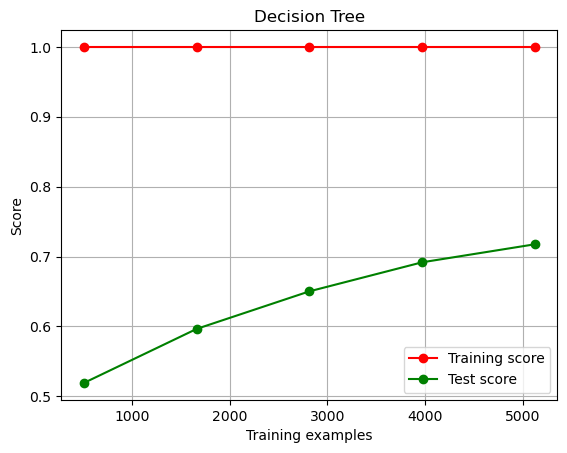

In [33]:
plt.figure()
plot_learning_curve(dt,"Decision Tree",data_cls,label_cls,ax=plt.gca(),n_jobs=4,cv=5)

<AxesSubplot:title={'center':'Random Forest'}, xlabel='Training examples', ylabel='Score'>

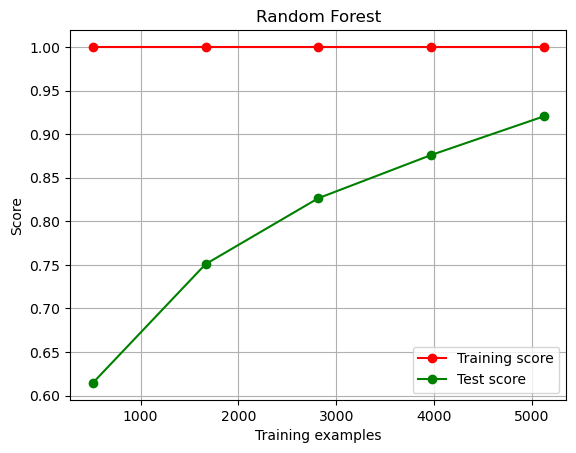

In [34]:
plt.figure()
plot_learning_curve(rf,"Random Forest",data_cls,label_cls,ax=plt.gca(),n_jobs=4,cv=5)

<AxesSubplot:title={'center':'SVM'}, xlabel='Training examples', ylabel='Score'>

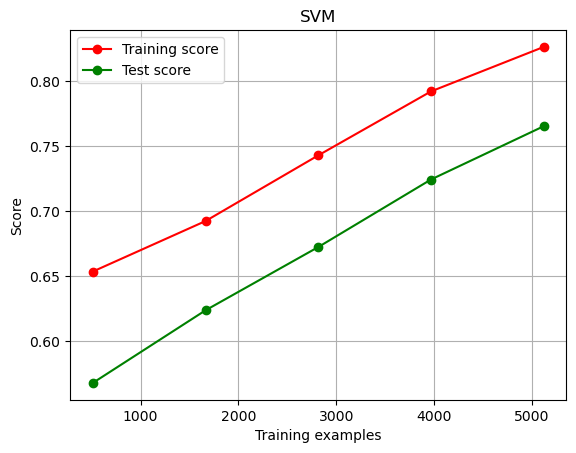

In [47]:
plt.figure()
plot_learning_curve(svc,"SVM",data_cls,label_cls,ax=plt.gca(),n_jobs=4,cv=5)